# Project Practices 4
Sonar Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [7]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
data.shape

(208, 61)

In [9]:
x=data.iloc[:,0:-1]
x.shape

(208, 60)

In [10]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [11]:
y=data.iloc[:,-1]
y.shape

(208,)

In [12]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [13]:
pca=PCA(n_components=10)   #to reduce the columns from 60 to 10

In [14]:
x=pca.fit_transform(x)
x.shape

(208, 10)

In [15]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [16]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder   #to convert categorical data to 0 and 1
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
data.shape

(208, 61)

In [19]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [20]:
x.shape

(208, 10)

In [21]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# visualizing data:

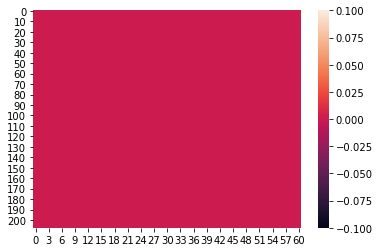

In [23]:
sns.heatmap(data.isnull())

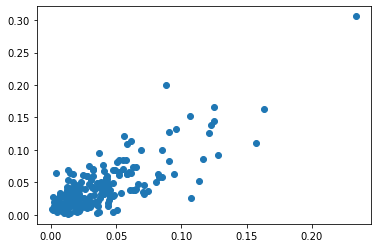

In [24]:
plt.scatter(data.iloc[:,1],data.iloc[:,2])
plt.show()

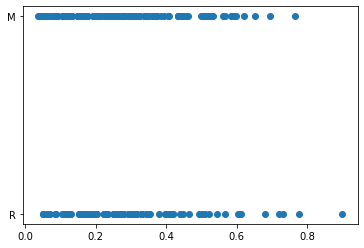

In [25]:
plt.scatter(data.iloc[:,40],data.iloc[:,-1])
plt.show()

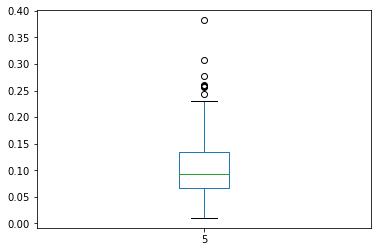

In [26]:
data[5].plot.box()

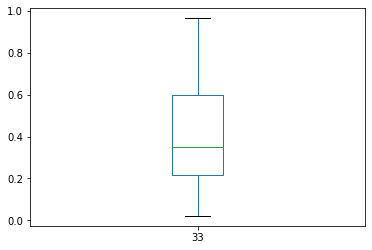

In [27]:
data[33].plot.box()

# training:

In [28]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [30]:
x_train.shape

(162, 10)

In [31]:
y_train.shape

(162,)

In [32]:
x_test.shape

(46, 10)

In [33]:
y_test.shape

(46,)

In [34]:
lg=LogisticRegression()

In [35]:
lg.fit(x_train,y_train)

LogisticRegression()

In [36]:
pred=lg.predict(x_test)

In [37]:
print("accuracy_score :",accuracy_score(pred,y_test))

accuracy_score : 0.8043478260869565


In [38]:
print("confusion_matrix :",confusion_matrix(y_test,pred))

confusion_matrix : [[20  1]
 [ 8 17]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.94      0.68      0.79        25

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.80        46
weighted avg       0.84      0.80      0.80        46



In [40]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [41]:
#or we can use function
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is :
0.8043478260869565
[[20  1]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.94      0.68      0.79        25

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.80        46
weighted avg       0.84      0.80      0.80        46



Accuracy score of GaussianNB() is :
0.8260869565217391
[[20  1]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.95      0.72      0.82        25

    accuracy                           0.83        46
   macro avg       0.84      0.84      0.83        46
weighted avg       0.85      0.83      0.83        46



Accuracy score of SVC() is :
0.8913043478260869
[[21  0]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
          

In [42]:
#here svc is showing highest accuracy score(0.89) and f-1(0.90) score 

In [43]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf=RandomForestClassifier(n_estimators=100,random_state=43)

In [45]:
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8913043478260869
[[20  1]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.95      0.84      0.89        25

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46

